### Worksheet 2

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

### Problem 3

*3a*
Given: $$f(x)=tanh((x+1.0)(x-0.8)(x+0.1))$$
$$d(t) = (f(t)-f(0))/t)$$
Upon calculation, we find the derivative of $f$ is given by:
$$f'(x) = \frac{3(x^2+0.2x-0.6)}{cosh((x-0.8)(x+0.1)(x+1)}$$


In [92]:
def f(x):
    product = (x+1.0)*(x-0.8)*(x+0.1)
    return np.tanh(product)

def d(t):
    return (f(t)-f(0))/t

def f_dash_x(x):
    """
    Calculates the derivative of f at point x
    """
    return 3*(x**2+0.2*x-0.26)*(1/np.cosh((x-0.8)*(x+0.1)*(x+1))**2)

def grad(f: Callable, point: float, step_size: float=1e-9) -> float:
    """
    numerically computes the gradient of f at a point. I will be using taylor approximation for this.
    """
    f_x = f(point)
    f_x_plus_1 = f(point+step_size)
    return (f_x_plus_1 - f_x) / step_size

In [93]:
t = np.linspace(-5, 5, 100000)
d_t = d(t)
f_x = f(t)
f_dash_0 = f_dash_x(0)

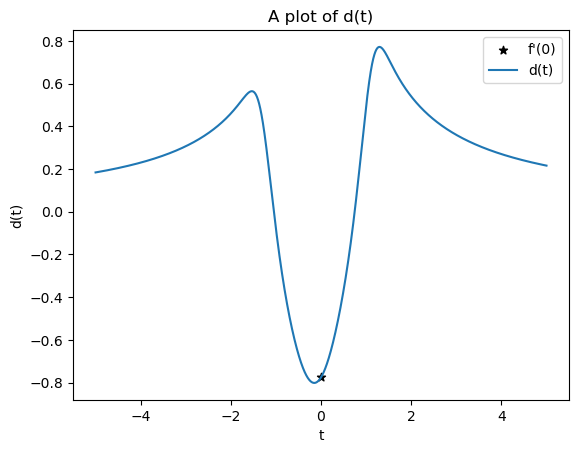

In [94]:
plt.scatter(0, f_dash_0, marker="*", color = "black", label = "f'(0)")
plt.plot(t, d_t, label = "d(t)")
plt.xlabel("t")
plt.ylabel("d(t)")
plt.title("A plot of d(t)")
plt.legend()
plt.show()

**Notes on values of d close to 0**
- We note that $d(0)$ is undefined. This means that the function $d(t)$ is assymptotically approaching 0 in the positive and negative directions as shown in the plot above
- The minimum of d(t) is close to the $f'(0)$. It is a good approximation of the derivating of f at point 0.

***




#### Question 3b

 Proof that if $f$ is a continous differentiable function and $f'(x_0)\neq 0$ then there exist an $\eta$ >0 such that $f(x_0)>f(x_0 - \eta f'(x_0)$.

Suppose that such a function existed.
We note that $f'(x_0)$ is the slope of the function at point $x_0$. This means that $f'(x_0)$ gives the direction with the greatest change in the function $f$ at point $x_0$.

Therefore, if we evaluate the function $f(x_0 - \eta f'(x_0)$, we will be moving in the direction of steepest descent of our function $f$ at point $x_0$ up to a certain threshold for the value of $\eta$. Therefore, there will always be a choice of $\eta$ for which $f(x_0)>f(x_0 - \eta f'(x_0)$ holds.
***



#### Question 3c

Proof that assuming $\nabla_x f(x_0) \neq 0$, then there exist an $\eta>0$ such that $f(x_0) > f(x_0 - \eta \nabla_x f(x_0))$

We note that this question is similar to $3b$ except it is in not limited to one dimension. The explaination is therefore very similar.

The gradient vector $\nabla_x f(x_0)$ will provide the direction of the largest change in the function at point $x_0$. therefore, if we know the direction of the largest change in the function, we can move in the direction of negative gradient as this will lead to us moving towards a lower point in the function space.

Therefore, if we choose a small enough $\eta$, we are guaranteed to land in a lower value of the function. Hence there exist a number $\eta$ such tyhat  $f(x_0) > f(x_0 - \eta \nabla_x f(x_0))$ holds.

***


#### Question 3d

Goal: Given the function $f$ defined below, compute the gradient at point (0.1, 5)
$$f(x_1, x_2) = \frac{x_1 ^ 2 + x_2^2}{100}-\frac{cos(3x_1-3x_2)+cos(3x_1+3x_2)}{2}$$

Upon calculation, we get:

$$\nabla f(x_1,x_2)=  \begin{pmatrix}
\frac{75 \sin\left(3x_{1} + 3x_{2}\right) + 75 \sin\left(3x_{1} - 3x_{2}\right) + x_{1}}{50}\\
\frac{75 \sin\left(3x_{2} + 3x_{1}\right) + 75 \sin\left(3x_{2} - 3x_{1}\right) + x_{2}}{50}
\end{pmatrix}
$$

The code cell below gives us functions to the gradient at point $(0.1,5)$


In [95]:
def f(x_1, x_2):
    square_sums = x_1**2 + x_2**2
    cos_sums = np.cos(3*x_1 - 3*x_2) + np.cos(3*x_1 + 3*x_2)
    out = (square_sums/100)- (cos_sums/2)
    return out

def grad_with_respect_to_x1(x_1, x_2):
    return (75 * np.sin(3 * x_1 + 3 * x_2) + 75 * np.sin(3 * x_1 - 3 * x_2) + x_1) / 50

def grad_with_respect_to_x2(x_1, x_2):
    return (75 * np.sin(3 * x_2 + 3 * x_1) + 75 * np.sin(3 * x_2 - 3 * x_1) + x_2) / 50

gradient_vector = np.array([grad_with_respect_to_x1(0.1, 5), grad_with_respect_to_x2(0.1, 5)])
print(f"Gradient vector: {gradient_vector}")

Gradient vector: [-0.67150939  1.96373111]


From the code above we see that:
$$\nabla f(0.1, 5) = \begin{pmatrix}
                       -0.6715093870184832 \\
                       1.9637311064103196
                      \end{pmatrix}$$

Having shown this. the code cell below will plot the function $g(t)=f(x_0+t \nabla_x f(x_0)$

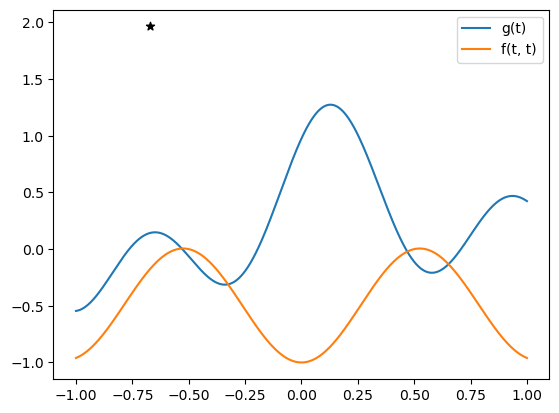

In [96]:
x_dash_1 = gradient_vector[0]
x_dash_2 = gradient_vector[1]


t = np.linspace(-1, 1, 100000)
f_t = f(t, t)
def g(t_):
    new_t = t_[:, np.newaxis]*gradient_vector + np.array([0.1, 5])
    g_t = f(new_t[:,0], new_t[:,1])
    return g_t

plt.plot(t, g(t), label = "g(t)")
plt.plot(t, f(t, t), label = "f(t, t)")
plt.scatter(x_dash_1, x_dash_2, marker="*", color = "black")
plt.legend()
plt.show()

***
### PROBLEM 4
